# NCAR Innovator Program Project
### Notebook by: Maria J. Molina (NCAR/University of Maryland) and Jessica Moulite (Howard University)

Here we compare the NOAA HOUSTON DUNN HELISTOP weather station temperature data with 2-m temperature data from ERA5. The objective of the comparison is to assess how representative state-of-the-art reanalysis is of local weather and trends, given its heavy use in climate assessment studies.

Importing packages

In [1]:
import datetime
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

Functions

In [2]:
def cel_to_far(tmp):
    """
    Convert celsius to farenheit
    """
    newtmp = []
    for i in tmp:
        if i == 99.9:
            newtmp.append(np.nan)
        if i != 99.9:
            newtmp.append((i * (9/5)) + 32)
    return np.array(newtmp)


def cel_to_nan(tmp):
    """
    Change 9999 to np.nan
    """
    newtmp = []
    for i in tmp:
        if i == 99.9:
            newtmp.append(np.nan)
        if i != 99.9:
            newtmp.append(i)
    return np.array(newtmp)


def convert_to_datetime(time_value):
    """
    Convert to a datetime object to be able to compute time difference.
    """
    return datetime.datetime(
        pd.to_datetime(time_value).year,
        pd.to_datetime(time_value).month,
        pd.to_datetime(time_value).day,
        pd.to_datetime(time_value).hour,
        pd.to_datetime(time_value).minute,
        pd.to_datetime(time_value).second,
    )


def compute_time_difference(a, b):
    """
    Compute time difference between two times.
    """
    if a >= b:
        return convert_to_datetime(a) - convert_to_datetime(b)
    if b > a:
        return convert_to_datetime(b) - convert_to_datetime(a)


def extract_era5_time(t_daily, t_full):
    """
    Extract the era5 temperature corresponding time.
    """
    era5_time_array = []

    for i, j in zip(t_daily.time, t_daily):

        tmp = t_full.sel(
            time=slice(i, pd.to_datetime(i.values) + datetime.timedelta(hours=23)))

        era5_time_array.append(tmp.where(tmp == j, drop=True).time.values)

    return era5_time_array

## Open ERA5 data (2008-present)

In [3]:
# open files
ds_ = xr.open_mfdataset(
    '/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.sfc/*/e5.oper.an.sfc.128_167_2t.ll025sc.*.nc')['VAR_2T']

In [4]:
ds_

<xarray.DataArray 'VAR_2T' (time: 501864, latitude: 721, longitude: 1440)>
dask.array<concatenate, shape=(501864, 721, 1440), dtype=float32, chunksize=(744, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1965-03-01 ... 2022-05-31T23:00:00
Attributes: (12/14)
    long_name:                                          2 metre temperature
    short_name:                                         2t
    units:                                              K
    original_format:                                    WMO GRIB 1 with ECMWF...
    ecmwf_local_table:                                  128
    ecmwf_parameter:                                    167
    ...                                                 ...
    grid_specification:                                 0.25 degree x 0.25 de...
    rda_dataset:                                        ds633.0
    rda_dataset_url:                                    https:/rda.ucar.edu/d...
    rda_dataset_doi:                                    DOI: 10.5065/BH6N-5N20
    rda_dataset_group:                                  ERA5 atmospheric surf...
    QuantizeGranularBitGroomNumberOfSignificantDigits:  7

## Open NOAA HOUSTON DUNN HELISTOP station data

In [5]:
HOU_temp = pd.read_csv('/glade/scratch/molina/3043194.csv', low_memory=False)

In [6]:
HOU_temp

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,MW1,OC1,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,72059400188,"HOUSTON DUNN HELISTOP, TX US",29.717,-95.383,69.2,2008-10-22T15:35:00,4,AUTO,KMCJ,V020,...,NaN,NaN,V020,MET061METAR KMCJ 221535Z AUTO 12005KT 10SM CLR...,AUTO,"99999,9",4,"+0240,1","016093,1,N,1","120,1,N,0026,1"
1,72059400188,"HOUSTON DUNN HELISTOP, TX US",29.717,-95.383,69.2,2008-10-22T16:00:00,4,FM-15,KMCJ,V020,...,NaN,NaN,V020,MET061METAR KMCJ 221555Z AUTO 11008KT 10SM CLR...,FM-15,"99999,9",4,"+0240,1","016093,1,N,1","110,1,N,0041,1"
2,72059400188,"HOUSTON DUNN HELISTOP, TX US",29.717,-95.383,69.2,2008-10-22T16:15:00,4,AUTO,KMCJ,V020,...,NaN,"0077,1",V020,MET064METAR KMCJ 221615Z AUTO 12012G15KT 10SM ...,AUTO,"99999,9",4,"+0250,1","016093,1,N,1","120,1,N,0062,1"
3,72059400188,"HOUSTON DUNN HELISTOP, TX US",29.717,-95.383,69.2,2008-10-22T16:35:00,4,AUTO,KMCJ,V020,...,NaN,NaN,V020,MET061METAR KMCJ 221635Z AUTO 13005KT 10SM CLR...,AUTO,"99999,9",4,"+0250,1","016093,1,N,1","130,1,N,0026,1"
4,72059400188,"HOUSTON DUNN HELISTOP, TX US",29.717,-95.383,69.2,2008-10-22T17:00:00,4,FM-15,KMCJ,V020,...,NaN,"0072,1",V020,MET067METAR KMCJ 221655Z AUTO 13006G14KT 10SM ...,FM-15,"99999,9",4,"+0260,1","016093,1,N,1","130,1,N,0031,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326808,72059400188,"HOUSTON DUNN HELISTOP, TX US",29.717,-95.383,69.2,2022-08-02T06:35:00,6,FM-15,KMCJ,V020,...,NaN,"0082,5",V020,MET07608/02/22 00:35:02 METAR KMCJ 020635Z 170...,FM-15,"99999,9",6,"+0270,5","016093,5,N,5","170,5,N,0046,5"
326809,72059400188,"HOUSTON DUNN HELISTOP, TX US",29.717,-95.383,69.2,2022-08-02T06:55:00,6,FM-15,KMCJ,V020,...,NaN,NaN,V020,MET07308/02/22 00:55:02 METAR KMCJ 020655Z 170...,FM-15,"99999,9",6,"+0270,C","016093,5,N,5","170,5,V,0051,5"
326810,72059400188,"HOUSTON DUNN HELISTOP, TX US",29.717,-95.383,69.2,2022-08-02T07:15:00,6,FM-15,KMCJ,V020,...,NaN,"0062,7",V020,MET07608/02/22 01:15:02 METAR KMCJ 020715Z VRB...,FM-15,"99999,9",6,"+0270,5","016093,5,N,5","999,9,V,0031,5"
326811,72059400188,"HOUSTON DUNN HELISTOP, TX US",29.717,-95.383,69.2,2022-08-02T07:35:00,6,FM-15,KMCJ,V020,...,NaN,"0077,5",V020,MET07908/02/22 01:35:02 METAR KMCJ 020735Z 170...,FM-15,"99999,9",6,"+0270,5","016093,5,N,5","170,5,V,0036,5"


In [7]:
# subset the data using dates of interest (what is available in ERA5)
HOU_temp = HOU_temp[(
    HOU_temp['DATE'] >= str(
        pd.to_datetime(ds_.coords['time'].isel(time=0).values))) & (
    HOU_temp['DATE'] <= str(
        pd.to_datetime(ds_.coords['time'].isel(time=-1).values)))]

In [8]:
time_date = []
temperature_C = []

for j, i in zip(HOU_temp['DATE'].values, HOU_temp['TMP'].values.astype(str)):

    time_date.append(j)

    # convert the string format to decimal format (originally in METAR code)
    temperature_C.append(
        float(i[0]+i.split(',')[0][2:-1]+'.'+i.split(',')[0][-1]))

time_date = np.array(time_date)
temperature_C = np.array(temperature_C)

temperature_F = cel_to_far(temperature_C)
temperature_C = cel_to_nan(temperature_C)

In [9]:
# making into dataframe for easier manipulation

# initialize data of lists.
data = {'Datetime': pd.to_datetime(time_date),
        'Temperature_C': temperature_C,
        'Temperature_F': temperature_F,
        'Latitude': HOU_temp['LATITUDE'],
        'Longitude': HOU_temp['LONGITUDE'],
       }

# Create DataFrame and quality control
df = pd.DataFrame(data)
df = df.dropna()  # drop any nan values
df = df.drop_duplicates(keep='first')
# drop any duplicate rows
df = df[~df['Datetime'].duplicated()].drop_duplicates()

## Select temperatures from ERA5 using NOAA metadata (lat, lon, and hour)

In [10]:
ERA5_temperatures_C = []
ERA5_date = []

for lat, lon, date in zip(df['Latitude'], df['Longitude'] % 360, df['Datetime']):

    tmp = ds_.sel(longitude=lon, latitude=lat, time=date, method='nearest')

    ERA5_temperatures_C.append((tmp - 273.15).values)

    ERA5_date.append(tmp.coords['time'].values)

In [11]:
ERA5_temperatures_C = np.array(ERA5_temperatures_C)

In [12]:
ERA5_temperatures_F = cel_to_far(ERA5_temperatures_C)

In [13]:
# initialize data of lists.
data = {'Datetime': pd.to_datetime(ERA5_date),
        'Temperature_C': ERA5_temperatures_C,
        'Temperature_F': ERA5_temperatures_F,
       }

df_era5 = pd.DataFrame(data)

In [14]:
# drop duplicate rows
df = df[~df_era5['Datetime'].duplicated().values]
df_era5 = df_era5[~df_era5['Datetime'].duplicated()].drop_duplicates()

### clean up dates prior to computation of metrics

In [15]:
df

,Datetime,Temperature_C,Temperature_F,Latitude,Longitude
0,2008-10-22 15:35:00,24.0,75.2,29.717,-95.383
3,2008-10-22 16:35:00,25.0,77.0,29.717,-95.383
6,2008-10-22 17:35:00,26.0,78.8,29.717,-95.383
9,2008-10-22 18:35:00,27.0,80.6,29.717,-95.383
12,2008-10-22 19:35:00,27.0,80.6,29.717,-95.383
...,...,...,...,...,...
322502,2022-05-30 19:35:00,30.0,86.0,29.717,-95.383
322505,2022-05-30 20:35:00,31.0,87.8,29.717,-95.383
322508,2022-05-30 21:35:00,30.0,86.0,29.717,-95.383
322511,2022-05-30 22:35:00,29.0,84.2,29.717,-95.383


In [19]:
df['Datetime'].iloc[9]

Timestamp('2008-10-23 00:35:00')

In [20]:
# clean up dates to ensure start and end have 24 hours
df = df[df['Datetime'] >= df['Datetime'].iloc[9]]

In [21]:
df

,Datetime,Temperature_C,Temperature_F,Latitude,Longitude
27,2008-10-23 00:35:00,20.0,68.0,29.717,-95.383
30,2008-10-23 01:35:00,20.0,68.0,29.717,-95.383
33,2008-10-23 02:35:00,19.0,66.2,29.717,-95.383
36,2008-10-23 03:35:00,16.0,60.8,29.717,-95.383
39,2008-10-23 04:35:00,15.0,59.0,29.717,-95.383
...,...,...,...,...,...
322502,2022-05-30 19:35:00,30.0,86.0,29.717,-95.383
322505,2022-05-30 20:35:00,31.0,87.8,29.717,-95.383
322508,2022-05-30 21:35:00,30.0,86.0,29.717,-95.383
322511,2022-05-30 22:35:00,29.0,84.2,29.717,-95.383


In [22]:
df_era5

,Datetime,Temperature_C,Temperature_F
0,2008-10-22 16:00:00,25.201746,77.363143
3,2008-10-22 17:00:00,26.501368,79.702462
6,2008-10-22 18:00:00,26.854364,80.337856
9,2008-10-22 19:00:00,26.054926,78.898867
12,2008-10-22 20:00:00,26.383600,79.490480
...,...,...,...
320756,2022-05-30 20:00:00,31.980738,89.565328
320759,2022-05-30 21:00:00,31.442926,88.597268
320762,2022-05-30 22:00:00,30.453089,86.815560
320765,2022-05-30 23:00:00,30.224970,86.404946


In [23]:
df_era5['Datetime'].iloc[8]

Timestamp('2008-10-23 00:00:00')

In [24]:
df_era5 = df_era5[(df_era5['Datetime'] >= df_era5['Datetime'].iloc[8])]
df_era5 = df_era5[(df_era5['Datetime'] <= df['Datetime'].iloc[-1])]

In [25]:
# confirm start and end dates are the same
assert df['Datetime'].iloc[0].date() == df_era5['Datetime'].iloc[0].date()
assert df['Datetime'].iloc[-1].date() == df_era5['Datetime'].iloc[-1].date()

## Create new variables

### Daily max and min temperatures

In [26]:
# Daily NOAA temperature maximum
tmax_NOAA_daily = df.set_index('Datetime').resample('1D').max()

In [27]:
# Daily ERA5 temperature maximum
tmax_ERA5_daily = df_era5.set_index('Datetime').resample('1D').max()

In [28]:
# Daily NOAA temperature minimum
tmin_NOAA_daily = df.set_index('Datetime').resample('1D').min()

In [29]:
# Daily ERA5 temperature minimum
tmin_ERA5_daily = df_era5.set_index('Datetime').resample('1D').min()

In [30]:
# double check array lengths
assert len(tmax_NOAA_daily) == len(tmax_ERA5_daily), 'Arrays not same length'
assert len(tmin_NOAA_daily) == len(tmin_ERA5_daily), 'Arrays not same length'

### Time of daily max and min temperatures

In [31]:
# corresponding date/time for NOAA daily temperature maximum
tmax_NOAA_daily_datetime = df.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmax())['Temperature_C']

# remove missing dates
tmax_NOAA_daily = tmax_NOAA_daily[~np.isnat(tmax_NOAA_daily_datetime)]
tmax_NOAA_daily_datetime = tmax_NOAA_daily_datetime[~np.isnat(tmax_NOAA_daily_datetime)]

In [32]:
# corresponding date/time for NOAA daily temperature minimum
tmin_NOAA_daily_datetime = df.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmin())['Temperature_C']

# remove missing dates
tmin_NOAA_daily = tmin_NOAA_daily[~np.isnat(tmin_NOAA_daily_datetime)]
tmin_NOAA_daily_datetime = tmin_NOAA_daily_datetime[~np.isnat(tmin_NOAA_daily_datetime)]

In [33]:
# corresponding date/time for ERA5 daily temperature maximum
tmax_ERA5_daily_datetime = df_era5.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmax())['Temperature_C']

# remove missing dates
tmax_ERA5_daily = tmax_ERA5_daily[~np.isnat(tmax_ERA5_daily_datetime)]
tmax_ERA5_daily_datetime = tmax_ERA5_daily_datetime[~np.isnat(tmax_ERA5_daily_datetime)]

In [34]:
# corresponding date/time for ERA5 daily temperature minimum
tmin_ERA5_daily_datetime = df_era5.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmin())['Temperature_C']

# remove missing dates
tmin_ERA5_daily = tmin_ERA5_daily[~np.isnat(tmin_ERA5_daily_datetime)]
tmin_ERA5_daily_datetime = tmin_ERA5_daily_datetime[~np.isnat(tmin_ERA5_daily_datetime)]

In [35]:
# double check array lengths
assert len(tmax_NOAA_daily_datetime) == len(tmax_ERA5_daily_datetime), 'Arrays not same length'
assert len(tmin_NOAA_daily_datetime) == len(tmin_ERA5_daily_datetime), 'Arrays not same length'

AssertionError: Arrays not same length

In [36]:
for num, (i, j) in enumerate(zip(tmax_NOAA_daily_datetime.dt.date.values,
                                 tmax_ERA5_daily_datetime.dt.date.values)):
    if i != j:
        print(num, i, j)
        break

for num, (i, j) in enumerate(zip(tmin_NOAA_daily_datetime.dt.date.values,
                                 tmin_ERA5_daily_datetime.dt.date.values)):
    if i != j:
        print(num, i, j)
        break

3621 2018-12-29 2018-12-30
3621 2018-12-29 2018-12-30


In [37]:
tmax_NOAA_daily_datetime = tmax_NOAA_daily_datetime.drop('2018-12-29')
tmin_NOAA_daily_datetime = tmin_NOAA_daily_datetime.drop('2018-12-29')

In [38]:
# double check array lengths
assert len(tmax_NOAA_daily_datetime) == len(tmax_ERA5_daily_datetime), 'Arrays not same length'
assert len(tmin_NOAA_daily_datetime) == len(tmin_ERA5_daily_datetime), 'Arrays not same length'

### fix earlier array set!

In [39]:
tmax_NOAA_daily = tmax_NOAA_daily.drop('2018-12-29')
tmin_NOAA_daily = tmin_NOAA_daily.drop('2018-12-29')

In [40]:
# double check array lengths
assert len(tmax_NOAA_daily) == len(tmax_ERA5_daily), 'Arrays not same length'
assert len(tmin_NOAA_daily) == len(tmin_ERA5_daily), 'Arrays not same length'

### Corresponding temperatures at the time of the max/min of other product

In [41]:
# the NOAA temperature during the (i.e., same time as the
# daily ERA5 maximum temperature)

NOAA_temp_during_ERA5_tmax_C = []
NOAA_temp_during_ERA5_tmax_F = []

for i in tmax_ERA5_daily_datetime.values:

    NOAA_temp_during_ERA5_tmax_C.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_C'])

    NOAA_temp_during_ERA5_tmax_F.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_F'])

NOAA_temp_during_ERA5_tmax_C = np.array(NOAA_temp_during_ERA5_tmax_C)
NOAA_temp_during_ERA5_tmax_F = np.array(NOAA_temp_during_ERA5_tmax_F)

In [42]:
# the NOAA temperature during the (i.e., same time as the
# daily ERA5 minimum temperature)

NOAA_temp_during_ERA5_tmin_C = []
NOAA_temp_during_ERA5_tmin_F = []

for i in tmin_ERA5_daily_datetime.values:

    NOAA_temp_during_ERA5_tmin_C.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_C'])

    NOAA_temp_during_ERA5_tmin_F.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_F'])

NOAA_temp_during_ERA5_tmin_C = np.array(NOAA_temp_during_ERA5_tmin_C)
NOAA_temp_during_ERA5_tmin_F = np.array(NOAA_temp_during_ERA5_tmin_F)

In [43]:
# the ERA5 temperature during the (i.e., same time as the
# daily NOAA maximum temperature)

ERA5_temp_during_NOAA_tmax_C = []
ERA5_temp_during_NOAA_tmax_F = []

for i in tmax_NOAA_daily_datetime.values:

    ERA5_temp_during_NOAA_tmax_C.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_C'])

    ERA5_temp_during_NOAA_tmax_F.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_F'])

ERA5_temp_during_NOAA_tmax_C = np.array(ERA5_temp_during_NOAA_tmax_C)
ERA5_temp_during_NOAA_tmax_F = np.array(ERA5_temp_during_NOAA_tmax_F)

In [44]:
# the ERA5 temperature during the (i.e., same time as the
# daily NOAA minimum temperature)

ERA5_temp_during_NOAA_tmin_C = []
ERA5_temp_during_NOAA_tmin_F = []

for i in tmin_NOAA_daily_datetime.values:

    ERA5_temp_during_NOAA_tmin_C.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_C'])

    ERA5_temp_during_NOAA_tmin_F.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_F'])

ERA5_temp_during_NOAA_tmin_C = np.array(ERA5_temp_during_NOAA_tmin_C)
ERA5_temp_during_NOAA_tmin_F = np.array(ERA5_temp_during_NOAA_tmin_F)

In [45]:
# double check array lengths
assert len(NOAA_temp_during_ERA5_tmax_C) == len(ERA5_temp_during_NOAA_tmax_C), 'Arrays not same length'
assert len(NOAA_temp_during_ERA5_tmin_C) == len(ERA5_temp_during_NOAA_tmin_C), 'Arrays not same length'
assert len(NOAA_temp_during_ERA5_tmax_F) == len(ERA5_temp_during_NOAA_tmax_F), 'Arrays not same length'
assert len(NOAA_temp_during_ERA5_tmin_F) == len(ERA5_temp_during_NOAA_tmin_F), 'Arrays not same length'

### differences (temperature)

In [46]:
# difference between NOAA temperature maximum and
# the ERA5 corresponding temperature at that time (C)
tmax_daily_difference_C = tmax_NOAA_daily['Temperature_C'] - ERA5_temp_during_NOAA_tmax_C

In [47]:
# difference between NOAA temperature maximum and
# the ERA5 corresponding temperature at that time (F)
tmax_daily_difference_F = tmax_NOAA_daily['Temperature_F'] - ERA5_temp_during_NOAA_tmax_F

In [48]:
# difference between NOAA temperature minimum and
# the ERA5 corresponding temperature at that time (C)
tmin_daily_difference_C = tmin_NOAA_daily['Temperature_C'] - ERA5_temp_during_NOAA_tmin_C

In [49]:
# difference between NOAA temperature minimum and
# the ERA5 corresponding temperature at that time (C)
tmin_daily_difference_F = tmin_NOAA_daily['Temperature_F'] - ERA5_temp_during_NOAA_tmin_F

### compute time differences

In [50]:
# absolute time difference between daily maximum temperature (ERA5 and NOAA)
tmax_diff = []
for i, j in zip(pd.to_datetime(tmax_NOAA_daily_datetime), tmax_ERA5_daily_datetime):
    tmax_diff.append(compute_time_difference(i, j))
tmax_diff = np.array(tmax_diff)

In [51]:
# absolute time difference between daily minimum temperature (ERA5 and NOAA)
tmin_diff = []
for i, j in zip(pd.to_datetime(tmin_NOAA_daily_datetime), tmin_ERA5_daily_datetime):
    tmin_diff.append(compute_time_difference(i, j))
tmin_diff = np.array(tmin_diff)

### create single csv file

In [52]:
data = {

    'NOAA_HOU_Temperature_Daily_Max (C)': tmax_NOAA_daily['Temperature_C'],
    'NOAA_HOU_Temperature_Daily_Max (F)': tmax_NOAA_daily['Temperature_F'],
    'NOAA_HOU_Temperature_Daily_Max_Datetime': tmax_NOAA_daily_datetime,

    'NOAA_HOU_Temperature_Daily_Min (C)': tmin_NOAA_daily['Temperature_C'],
    'NOAA_HOU_Temperature_Daily_Min (F)': tmin_NOAA_daily['Temperature_F'],
    'NOAA_HOU_Temperature_Daily_Min_Datetime': tmin_NOAA_daily_datetime,

    'ERA5_Temperature_Daily_Max (C)': tmax_ERA5_daily['Temperature_C'],
    'ERA5_Temperature_Daily_Max (F)': tmax_ERA5_daily['Temperature_F'],
    'ERA5_Temperature_Daily_Max_Datetime': tmax_ERA5_daily_datetime,

    'ERA5_Temperature_Daily_Min (C)': tmin_ERA5_daily['Temperature_C'],
    'ERA5_Temperature_Daily_Min (F)': tmin_ERA5_daily['Temperature_F'],
    'ERA5_Temperature_Daily_Min_Datetime': tmin_ERA5_daily_datetime,


    'ERA5_Corresponding_Temperature_During_NOAA_HOU_Daily_Max (C)': ERA5_temp_during_NOAA_tmax_C,
    'ERA5_Corresponding_Temperature_During_NOAA_HOU_Daily_Max (F)': ERA5_temp_during_NOAA_tmax_F,

    'ERA5_Corresponding_Temperature_During_NOAA_HOU_Daily_Min (C)': ERA5_temp_during_NOAA_tmin_C,
    'ERA5_Corresponding_Temperature_During_NOAA_HOU_Daily_Min (F)': ERA5_temp_during_NOAA_tmin_F,

    'NOAA_HOU_Corresponding_Temperature_During_ERA5_Daily_Max (C)': NOAA_temp_during_ERA5_tmax_C,
    'NOAA_HOU_Corresponding_Temperature_During_ERA5_Daily_Max (F)': NOAA_temp_during_ERA5_tmax_F,

    'NOAA_HOU_Corresponding_Temperature_During_ERA5_Daily_Min (C)': NOAA_temp_during_ERA5_tmin_C,
    'NOAA_HOU_Corresponding_Temperature_During_ERA5_Daily_Min (F)': NOAA_temp_during_ERA5_tmin_F,


    'Daily_Temperature_Max_Difference (C)': tmax_daily_difference_C.values,
    'Daily_Temperature_Max_Difference (F)': tmax_daily_difference_F.values,

    'Daily_Temperature_Min_Difference (C)': tmin_daily_difference_C.values,
    'Daily_Temperature_Min_Difference (F)': tmin_daily_difference_F.values,

    'Absolute_time_difference_tmax_ERA5_NOAA_HOU (day H:M:S)': tmax_diff,
    'Absolute_time_difference_tmin_ERA5_NOAA_HOU (day H:M:S)': tmin_diff,

       }

In [53]:
df_FINAL = pd.DataFrame(data)

In [54]:
df_FINAL

,NOAA_HOU_Temperature_Daily_Max (C),NOAA_HOU_Temperature_Daily_Max (F),NOAA_HOU_Temperature_Daily_Max_Datetime,NOAA_HOU_Temperature_Daily_Min (C),NOAA_HOU_Temperature_Daily_Min (F),NOAA_HOU_Temperature_Daily_Min_Datetime,ERA5_Temperature_Daily_Max (C),ERA5_Temperature_Daily_Max (F),ERA5_Temperature_Daily_Max_Datetime,ERA5_Temperature_Daily_Min (C),...,NOAA_HOU_Corresponding_Temperature_During_ERA5_Daily_Max (C),NOAA_HOU_Corresponding_Temperature_During_ERA5_Daily_Max (F),NOAA_HOU_Corresponding_Temperature_During_ERA5_Daily_Min (C),NOAA_HOU_Corresponding_Temperature_During_ERA5_Daily_Min (F),Daily_Temperature_Max_Difference (C),Daily_Temperature_Max_Difference (F),Daily_Temperature_Min_Difference (C),Daily_Temperature_Min_Difference (F),Absolute_time_difference_tmax_ERA5_NOAA_HOU (day H:M:S),Absolute_time_difference_tmin_ERA5_NOAA_HOU (day H:M:S)
Datetime,,,,,,,,,,,,,,,,,,,,,
2008-10-23,20.0,68.0,2008-10-23 00:35:00,13.0,55.4,2008-10-23 11:35:00,21.567896,70.822213,2008-10-23 00:00:00,13.583918,...,20.0,68.0,13.0,55.4,-0.499475,-0.899056,-0.988764,-1.779775,0 days 00:35:00,0 days 01:25:00
2008-10-24,25.0,77.0,2008-10-24 21:35:00,12.0,53.6,2008-10-24 08:35:00,23.916468,75.049642,2008-10-24 21:00:00,6.540124,...,24.0,75.2,12.0,53.6,2.127630,3.829734,4.322943,7.781298,0 days 00:35:00,0 days 01:25:00
2008-10-25,27.0,80.6,2008-10-25 19:35:00,18.0,64.4,2008-10-25 03:35:00,26.794336,80.229805,2008-10-25 21:00:00,9.885431,...,27.0,80.6,18.0,64.4,0.630835,1.135502,4.869116,8.764408,0 days 01:25:00,0 days 05:25:00
2008-10-26,29.0,84.2,2008-10-26 21:35:00,18.0,64.4,2008-10-26 11:35:00,28.054346,82.497823,2008-10-26 21:00:00,10.964563,...,28.0,82.4,18.0,64.4,2.219152,3.994474,7.035437,12.663786,0 days 00:35:00,0 days 00:25:00
2008-10-27,24.0,75.2,2008-10-27 00:35:00,14.0,57.2,2008-10-27 13:35:00,21.866724,71.360103,2008-10-27 00:00:00,14.391657,...,27.0,80.6,15.0,59.0,2.819921,5.075859,-0.656519,-1.181734,0 days 00:35:00,0 days 00:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-26,33.0,91.4,2022-05-26 21:35:00,22.0,71.6,2022-05-26 07:35:00,33.578789,92.441820,2022-05-26 21:00:00,16.104883,...,32.0,89.6,23.0,73.4,-0.158287,-0.284917,4.747107,8.544792,0 days 00:35:00,0 days 01:25:00
2022-05-27,34.0,93.2,2022-05-27 21:35:00,23.0,73.4,2022-05-27 08:35:00,34.061180,93.310124,2022-05-27 23:00:00,21.343439,...,34.0,93.2,23.0,73.4,-0.029716,-0.053490,1.125463,2.025834,0 days 01:25:00,0 days 03:25:00
2022-05-28,34.0,93.2,2022-05-28 21:35:00,24.0,75.2,2022-05-28 09:35:00,33.936485,93.085674,2022-05-28 00:00:00,19.716211,...,34.0,93.2,24.0,75.2,0.746925,1.344466,4.138037,7.448466,0 days 21:35:00,0 days 01:25:00


### data visualizations

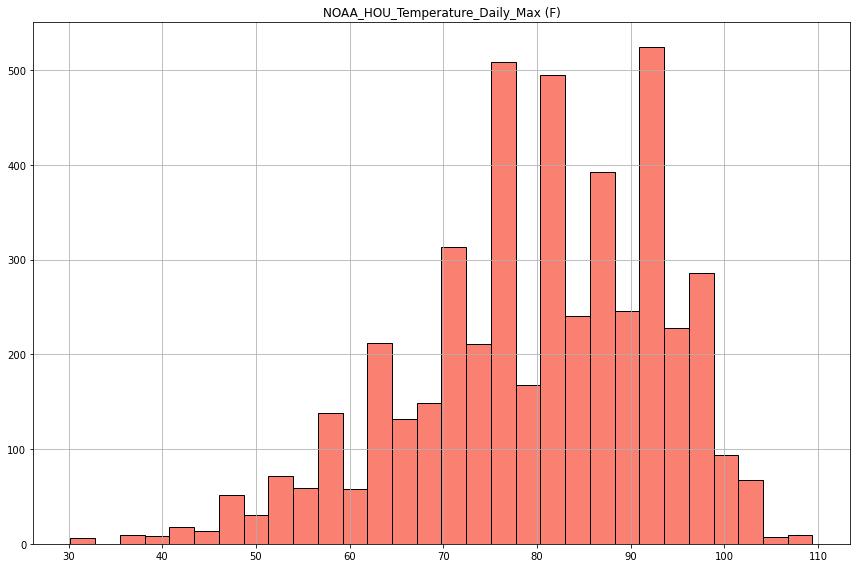

In [55]:
fig = df_FINAL.hist(
    'NOAA_HOU_Temperature_Daily_Max (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

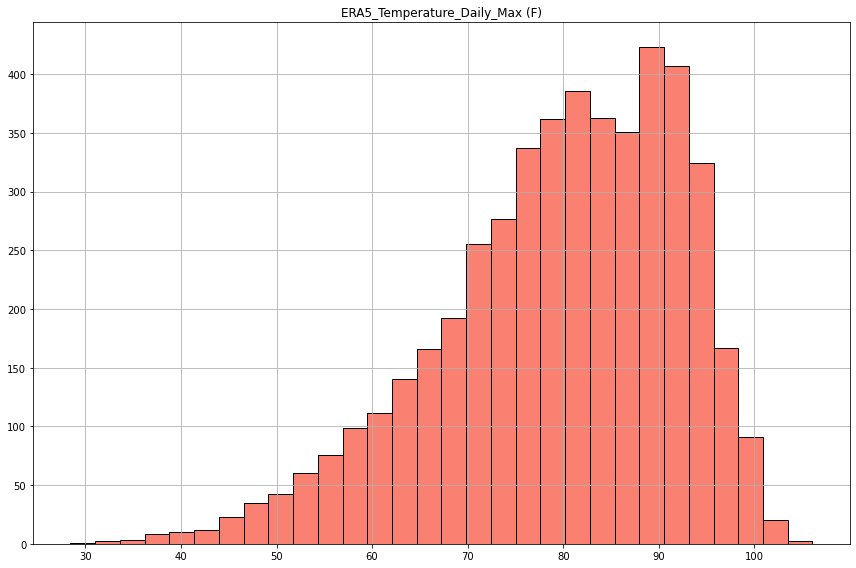

In [56]:
fig = df_FINAL.hist(
    'ERA5_Temperature_Daily_Max (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

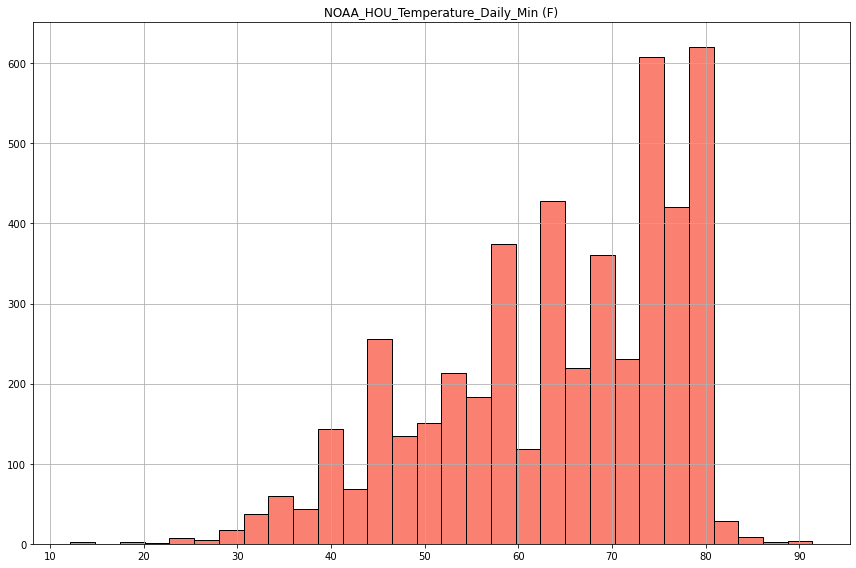

In [57]:
fig = df_FINAL.hist(
    'NOAA_HOU_Temperature_Daily_Min (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

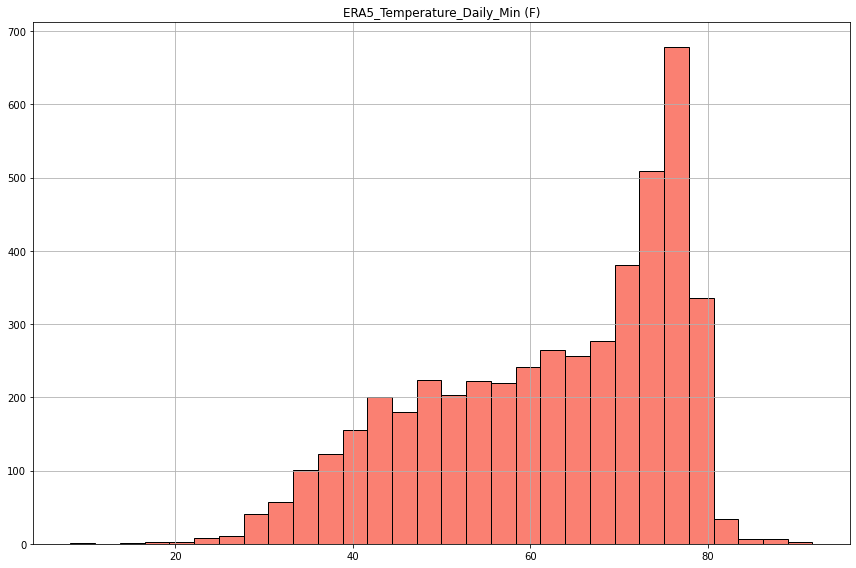

In [58]:
fig = df_FINAL.hist(
    'ERA5_Temperature_Daily_Min (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

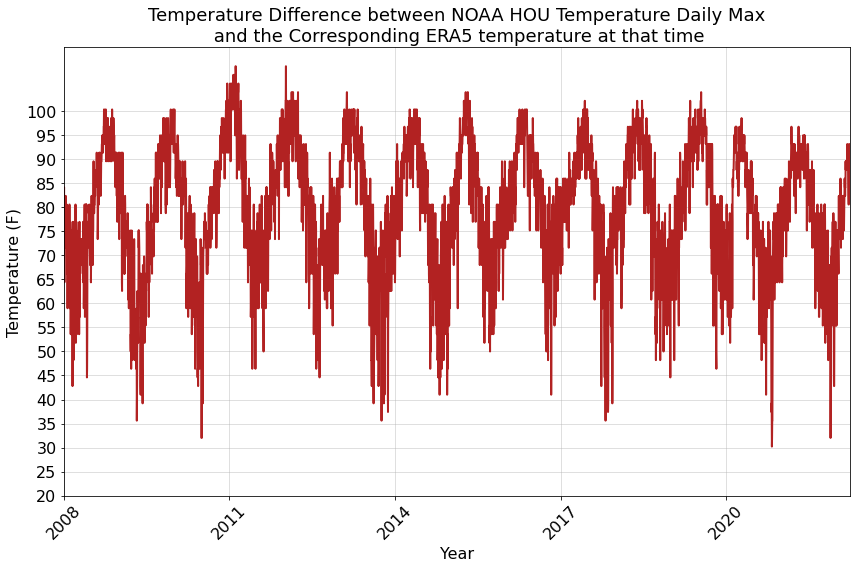

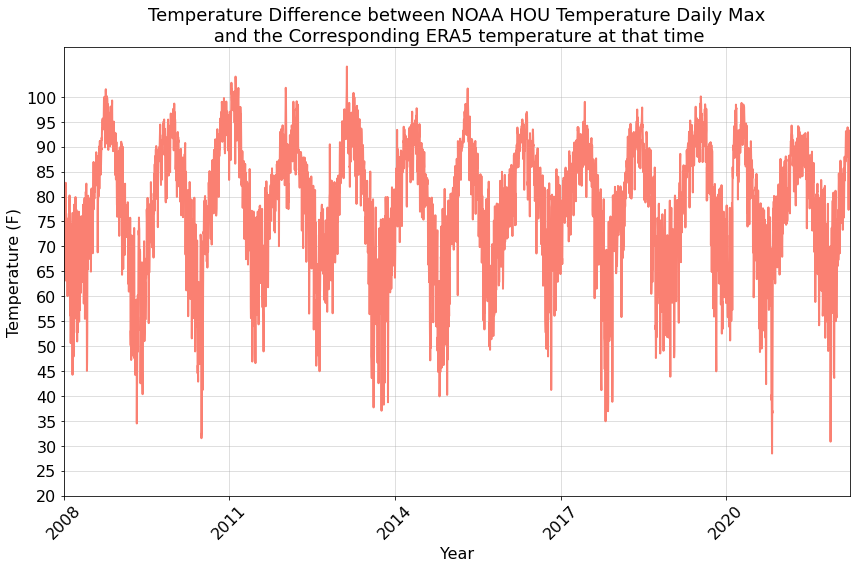

In [59]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(
    'Temperature Difference between NOAA HOU Temperature Daily Max\n and the Corresponding ERA5 temperature at that time', 
    fontsize=18)

ls0, = ax.plot(
    df_FINAL['NOAA_HOU_Temperature_Daily_Max (F)'].values, color='firebrick', lw=2.0)

ax.set_xticks(np.arange(
    0, df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_HOU_Daily_Max (F)'].values.shape[0])[::1000])
ax.set_xticklabels(pd.to_datetime(tmax_NOAA_daily_datetime).dt.year[::1000],
                   rotation=45, fontsize=16)
ax.set_xlabel('Year', fontsize=16)

ax.set_yticks(np.arange(20,101,1)[::5])
ax.set_yticklabels(np.arange(20,101,1)[::5], fontsize=16)
ax.set_ylabel('Temperature (F)', fontsize=16)

ax.grid('--', alpha=0.5)
ax.margins(x=0)

plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/TempDiff_SDandERA5.png', dpi=500)
plt.show()

# -- 

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(
    'Temperature Difference between NOAA HOU Temperature Daily Max\n and the Corresponding ERA5 temperature at that time', 
    fontsize=18)

ls1, = ax.plot(
    df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_HOU_Daily_Max (F)'].values, color='salmon', lw=2.0)

ax.set_xticks(np.arange(
    0, df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_HOU_Daily_Max (F)'].values.shape[0])[::1000])
ax.set_xticklabels(pd.to_datetime(tmax_NOAA_daily_datetime).dt.year[::1000],
                   rotation=45, fontsize=16)
ax.set_xlabel('Year', fontsize=16)

ax.set_yticks(np.arange(20,101,1)[::5])
ax.set_yticklabels(np.arange(20,101,1)[::5], fontsize=16)
ax.set_ylabel('Temperature (F)', fontsize=16)

ax.grid('--', alpha=0.5)
ax.margins(x=0)

plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/TempDiff_SDandERA5.png', dpi=500)
plt.show()

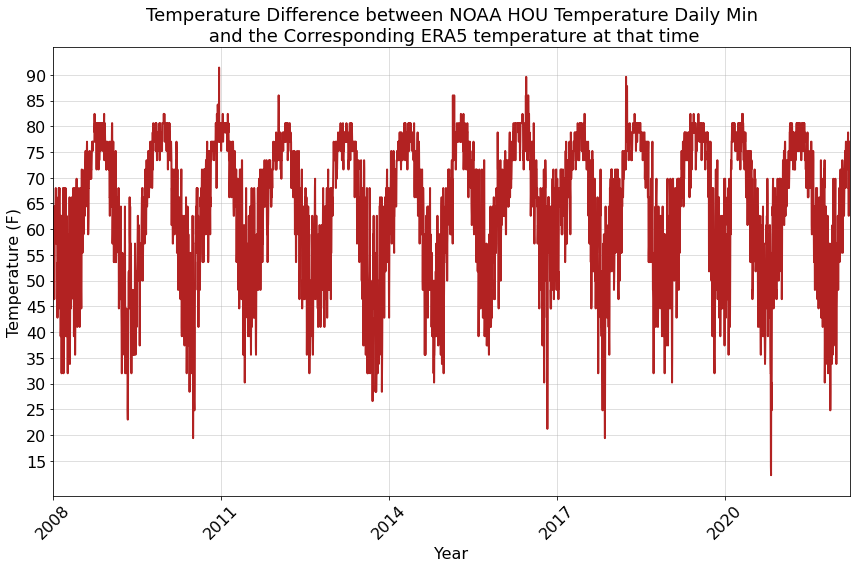

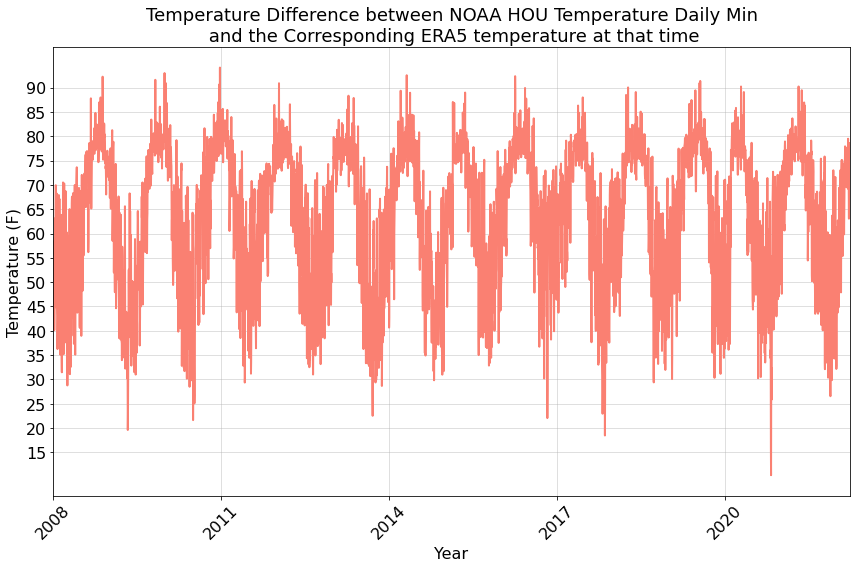

In [60]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(
    'Temperature Difference between NOAA HOU Temperature Daily Min\n and the Corresponding ERA5 temperature at that time', 
    fontsize=18)

ls0, = ax.plot(df_FINAL['NOAA_HOU_Temperature_Daily_Min (F)'].values, color='firebrick', lw=2.0)

ax.set_xticks(np.arange(0, df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_HOU_Daily_Min (F)'].values.shape[0])[::1000])
ax.set_xticklabels(pd.to_datetime(tmax_NOAA_daily_datetime).dt.year[::1000],
                   rotation=45, fontsize=16)
ax.set_xlabel('Year', fontsize=16)

ax.set_yticks(np.arange(15,91,1)[::5])
ax.set_yticklabels(np.arange(15,91,1)[::5], fontsize=16)
ax.set_ylabel('Temperature (F)', fontsize=16)

ax.grid('--', alpha=0.5)
ax.margins(x=0)

plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/TempDiff_SDandERA5.png', dpi=500)
plt.show()

# --

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(
    'Temperature Difference between NOAA HOU Temperature Daily Min\n and the Corresponding ERA5 temperature at that time', 
    fontsize=18)

ls1, = ax.plot(df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_HOU_Daily_Min (F)'].values, color='salmon', lw=2.0)

ax.set_xticks(np.arange(0, df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_HOU_Daily_Min (F)'].values.shape[0])[::1000])
ax.set_xticklabels(pd.to_datetime(tmax_NOAA_daily_datetime).dt.year[::1000],
                   rotation=45, fontsize=16)
ax.set_xlabel('Year', fontsize=16)

ax.set_yticks(np.arange(15,91,1)[::5])
ax.set_yticklabels(np.arange(15,91,1)[::5], fontsize=16)
ax.set_ylabel('Temperature (F)', fontsize=16)

ax.grid('--', alpha=0.5)
ax.margins(x=0)

plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/TempDiff_SDandERA5.png', dpi=500)
plt.show()

## save csv file

In [61]:
df_FINAL.to_csv(
    '/glade/scratch/molina/NOAA_HOU_ERA5_Temperature_2008-2022.csv')